<a href="https://colab.research.google.com/github/SamB83/TFforAIGooColab/blob/master/IMDBwGRUoptLSTM_Conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0


#tf.enable_eager_execution()

# !pip install -q tensorflow-datasets

2.0.0-beta0


In [0]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)


In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [0]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

b being a fan of silent films i looked forward to seeing this picture for the first time i was pretty disappointed br br as has been mentioned the film seems to be one long long commercial for the <OOV> <OOV> br br perhaps if the chase scene was about half the length that it is i may have enjoyed the film more but it got old very fast and while i recognize that reality is stretched many times in films without <OOV> a <OOV> enjoyment what was with the mexican <OOV> i mean they are chasing a car through the mountains a car that most of the time is moving at about one mile per hour yet they can't
b"Being a fan of silent films, I looked forward to seeing this picture for the first time. I was pretty disappointed. <br /><br />As has been mentioned, the film seems to be one long, long, commercial for the Maxwell automobile. <br /><br />Perhaps if the chase scene was about half the length that it is, I may have enjoyed the film more. But it got old very fast. And while I recognize that realit

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

W0708 16:09:53.530792 140735985201984 deprecation.py:323] From /Users/samarth/anaconda/envs/ipykernel_py3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/50
25000/25000 [==============================] - 96s 4ms/sample - loss: 0.6927 - accuracy: 0.5063 - val_loss: 0.6138 - val_accuracy: 0.6659
Epoch 2/50
25000/25000 [==============================] - 97s 4ms/sample - loss: 0.4294 - accuracy: 0.8068 - val_loss: 0.3677 - val_accuracy: 0.8419
Epoch 3/50
25000/25000 [==============================] - 100s 4ms/sample - loss: 0.2872 - accuracy: 0.8866 - val_loss: 0.3711 - val_accuracy: 0.8450
Epoch 4/50
25000/25000 [==============================] - 114s 5ms/sample - loss: 0.2254 - accuracy: 0.9147 - val_loss: 0.4006 - val_accuracy: 0.8461
Epoch 5/50
25000/25000 [==============================] - 115s 5ms/sample - loss: 0.1700 - accuracy: 0.9386 - val_loss: 0.4304 - val_accuracy: 0.8413
Epoch 6/50
25000/25000 [==============================] - 114s 5ms/sample - loss: 0.1148 - accuracy: 0.9614 - val_loss: 0.5197 - val_accuracy: 0.8347
Epoch 7/50
25000/25000 [============================

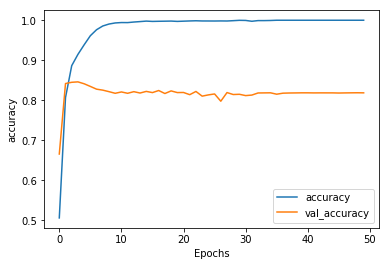

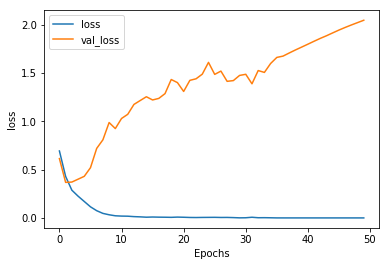

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [0]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
